In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

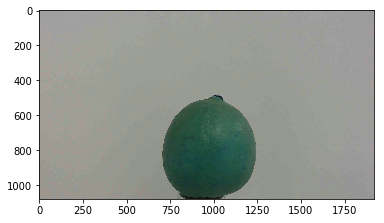

In [2]:
img = cv.imread(r'C:\Users\caoti\Videos\Logitech\LogiCapture/2019-10-29_18-42-03.jpg')
# img = cv.imread(r'C:\Users\caoti\Videos\Logitech\LogiCapture/2019-10-28_14-09-58.jpg')
# img = cv.resize(img, (0,0), fx = 0.5, fy = 0.5)
plt.imshow(img)
plt.show()

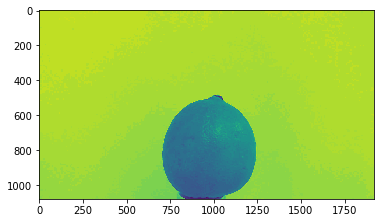

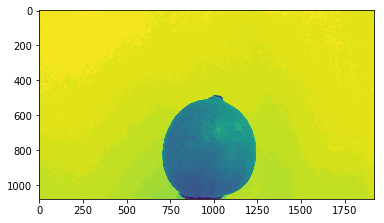

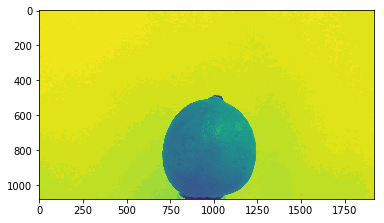

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

blurred = cv.GaussianBlur(gray,(3,3),cv.BORDER_DEFAULT)
plt.imshow(blurred)
plt.show()
med_blur = cv.medianBlur(gray,3)
plt.imshow(med_blur)
plt.show()

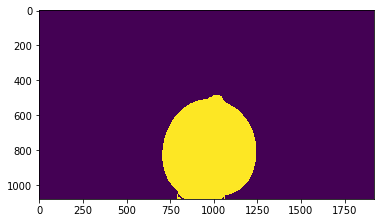

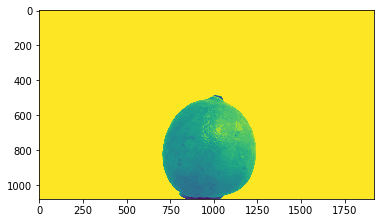

In [4]:
# th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV| 
#                                  cv.THRESH_OTSU) # Hacer una segmentación del objeto

th, threshed = cv.threshold(blurred,127, 255,cv.THRESH_BINARY_INV)
th2,thresh2 = cv.threshold(blurred,120, 255,cv.THRESH_TRUNC)

plt.imshow(threshed)
plt.show()
plt.imshow(thresh2)
plt.show()

# Encontrar los contornos
cnts = cv.findContours(threshed, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)[-2]
# cnts = cv.findContours(thresh2, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)[-2]
cnts = sorted(cnts, key=cv.contourArea)


for cnt in cnts: # Se interrumpe el ciclo si el valor es mayor
    if cv.contourArea(cnt) > 100:
        break
        
# Se crea una mascara y se hace una operación bitwise
mask = np.zeros(img.shape[:2],np.uint8)
# mask = np.ones(img.shape[:2],np.uint8)
cont = cv.drawContours(mask, [cnt],-1, 255, -1)
dst = cv.bitwise_and(img, img, mask=mask)
# dst = cv.bitwise_or(img, img, mask=mask)

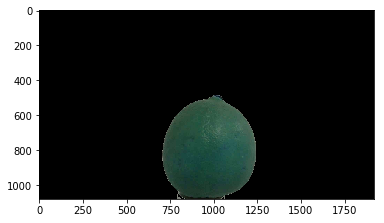

In [5]:
plt.imshow(dst)
plt.show()

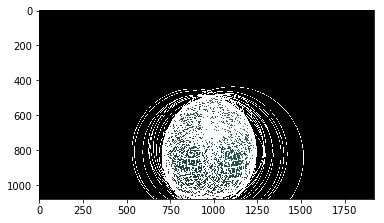

In [8]:
gdst = cv.imread('new_lemon.png',0)
ndst = dst
plt.imshow(gdst)
# circles = cv.HoughCircles(gdst,cv.HOUGH_GRADIENT,1, 110, np.array([]), 80, 10, 30, 80)
circles = cv.HoughCircles(gdst,cv.HOUGH_GRADIENT, 1, 30,
                         param1=50, param2=30, minRadius=0, maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibuja el circulo exterior
    cv.circle(ndst,(i[0],i[1]),i[2],(255,255,255),2)

plt.imshow(ndst)
plt.show()

In [ ]:
# new_path = r'C:\Users\caoti\Desktop\Lemon Images\Database/'
cv.imwrite('h_lemon.png', dst)